In [6]:
import os
import numpy as np
import pandas as pd

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '.DS_Store',
 'Cross-Validation - Linear Regression.ipynb',
 'Housing.csv',
 'empty.ipynb',
 'grid_search_image.png',
 'cv.png',
 'CarPrice_Assignment.csv']

In [4]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

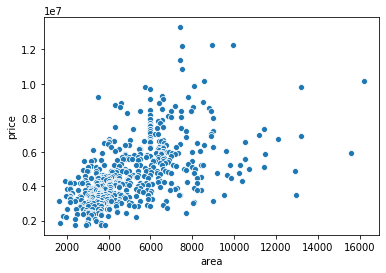

In [10]:
sns.scatterplot(x='area', y='price', data=df)
plt.show()

In [119]:
data = df.loc[:, ['area','price']]

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
train_data, test_data = train_test_split(data, train_size=0.7, random_state=10)

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [124]:
X_train = train_data_scaled[:, 0]
y_train = train_data_scaled[:, 1]
X_test = test_data_scaled[:, 0]
y_test = test_data_scaled[:, 1]

In [125]:
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

In [126]:
y_train.shape

(381, 1)

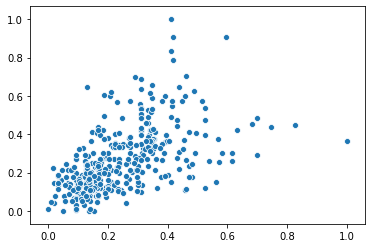

In [127]:
sns.scatterplot(x=X_train.squeeze(), y=y_train.squeeze())
plt.show()

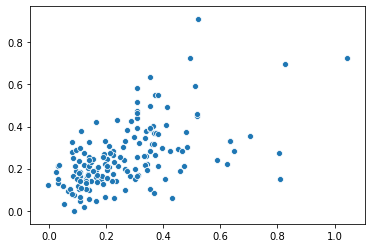

In [128]:
sns.scatterplot(x=X_test.squeeze(), y=y_test.squeeze())
plt.show()

## Using make_pipeline for creating higher order features

In [129]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [130]:
degrees = [1, 2, 3, 6, 10, 20]
y_train_pred = np.zeros((y_train.shape[0], len(degrees)))
y_test_pred = np.zeros((y_test.shape[0], len(degrees)))
for i, degree in enumerate(degrees):
    lr = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    lr.fit(X_train, y_train)
    
    y_train_pred[:, i] = lr.predict(X_train).squeeze()
    y_test_pred[:, i] = lr.predict(X_test).squeeze()

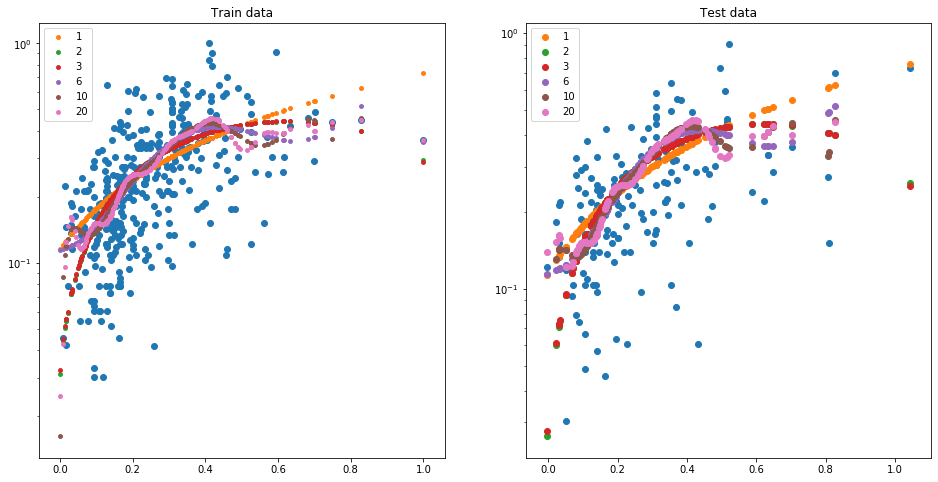

In [135]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

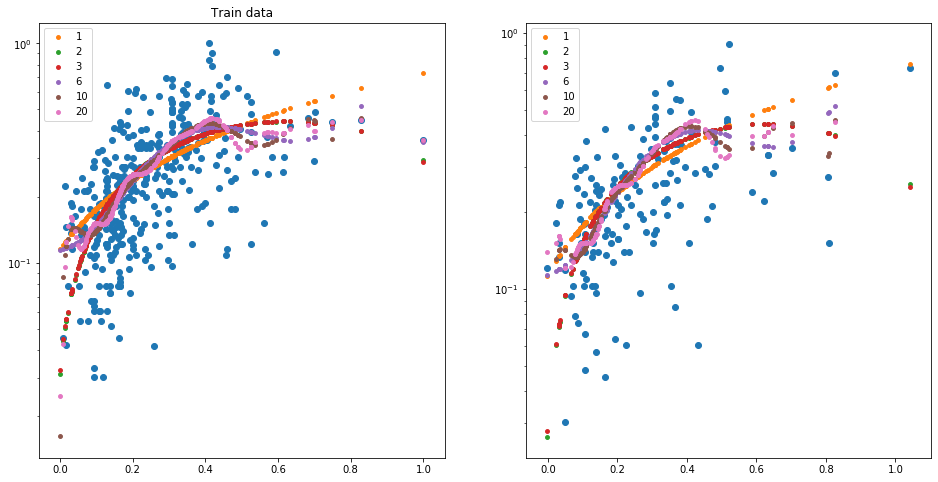

In [137]:
plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test)
plt.yscale('log')
for i, degree in enumerate(degrees):
    plt.scatter(X_test, y_test_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')

## Estimate R2

In [116]:
from sklearn.metrics import r2_score
import sklearn

In [118]:
for i, degree in enumerate(degrees):
    print('for degree '+str(degree), round(r2_score(y_train, y_train_pred[:, i]),2), round(r2_score(y_test, y_test_pred[:, i]),2))
    

for degree 1 0.29 0.25
for degree 2 0.34 0.22
for degree 3 0.34 0.22
for degree 6 0.36 0.11
for degree 10 0.37 -108.76
for degree 20 0.38 -328934257047.73
